<a href="https://colab.research.google.com/github/rifyalt/vial/blob/master/Scrapping_Data_Twitter_menggunakan_Python_dengan_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting Colab with Google Drive

In [ ]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install PIP

In [ ]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Library

In [ ]:
import csv
import numpy as np
import pandas as pd
import tweepy

## Request Key

In [ ]:
api_key = 'hKwFi5MHlO8B3MWuinYTMpNSU'
api_key_secret = 'E5YXbwuQiQajZodT64QEOfdbqKViHtO6pHJTbBjNPLEorCoWWO'

In [ ]:
access_token = '1199758897-GrgceZA0xxFW0xSIZc6nvrpP3BSWLtK4db9NKKQ'
access_token_secret = 'p1QiZc5J61wyuRKmtgIeA72UW5VAqJtyAhV5njVhokV58'

## Get tweet

In [ ]:
#collapse_show
#Accessing twitter API
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token=(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

search_key = 'reddoorz'

csvFile = open(search_key + '.csv','a+', newline = '', encoding = 'utf-8')
csvWriter = csv.writer(csvFile)

c = []
u = []
i = []
t = []

for tweet in tweepy.Cursor(api.search, q= search_key, count= 10000, lang = 'id', since='2022-08-10', until='2022-09-20').items(): # periode tweet
  print(tweet.created_at, tweet.id, tweet.user.name, tweet.text)
  c.append(tweet.created_at)
  u.append(tweet.user.name)
  i.append(tweet.id)
  t.append(tweet.text.encode('utf-8'))
  tweets = [tweet.created_at, tweet.id, tweet.user.name, tweet.text.encode('utf-8')]
  csvWriter.writerow(tweets)

dictTweets = {"waktu": c, "id":i, "username": u, "teks": t}

2022-09-19 23:59:38 1572012571305324545 Dib Sebelum kesini mah nginep di reddoorz yg horror &amp;&amp; kotor 😭😭🤣🤣

knp yaa gw kl pesen reddoorz gapernah dapet yg cakep… https://t.co/prNIjk0IT7
2022-09-19 23:43:39 1572008549315932161 anastasia ikє RT @NPaluPi: sarapan nasi uduk betawi jl. blora, samping Alfamidi, RedDoorz, ±50m dari stasiun sudirman. harga ada di daftar menu yang baru…
2022-09-19 22:23:59 1571988502153424896 🦖 Percival Schüttenbach 🌵 RT @NPaluPi: sarapan nasi uduk betawi jl. blora, samping Alfamidi, RedDoorz, ±50m dari stasiun sudirman. harga ada di daftar menu yang baru…
2022-09-19 19:40:53 1571947454588915712 Gongju Mama Pilih hotel dgn keterangan "refundable" ya, takut takut gak jd nonton, hotel gak bisa direfund pula.
Dan diinget ma… https://t.co/aaTQmayYLD
2022-09-19 18:27:00 1571928861633548289 rose @strilanya @convomf Ga yakin gw abis makan lgsg pulang 🤣 singgah ke reddoorz dulu yuk 🤣
2022-09-19 17:46:15 1571918607357194243 Askrlfess [askrl] hi info dong, baru do

## Convert to Pandas

In [ ]:
df = pd.DataFrame(dictTweets, columns= ["waktu","id","username","teks"])

In [ ]:
df

,waktu,id,username,teks
0,2022-09-19 23:59:38,1572012571305324545,Dib,b'Sebelum kesini mah nginep di reddoorz yg hor...
1,2022-09-19 23:43:39,1572008549315932161,anastasia ikє,b'RT @NPaluPi: sarapan nasi uduk betawi jl. bl...
2,2022-09-19 22:23:59,1571988502153424896,🦖 Percival Schüttenbach 🌵,b'RT @NPaluPi: sarapan nasi uduk betawi jl. bl...
3,2022-09-19 19:40:53,1571947454588915712,Gongju Mama,"b'Pilih hotel dgn keterangan ""refundable"" ya, ..."
4,2022-09-19 18:27:00,1571928861633548289,rose,b'@strilanya @convomf Ga yakin gw abis makan l...
...,...,...,...,...
231,2022-09-11 17:56:57,1569022197456568320,fani,"b'reddoorz kira2 250rb, travel 150bolak balik ..."
232,2022-09-11 15:36:08,1568986757642977284,Ian,"b'Botol racun, botol madu\n\nDikerubungi lalat..."
233,2022-09-11 11:59:36,1568932266012999682,papayaboobs,"b'@kostanalter Reddoorz aman kok, cari yang ra..."
234,2022-09-11 11:58:56,1568932100929368067,lonelyboysdontcry,"b'@kostanalter Reddoorz aman, tp musti selecti..."


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Web Scraping/twitter/scrape_cara_1.csv', index=True)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web Scraping/twitter/scrape_cara_1.csv')
df

,Unnamed: 0,waktu,id,username,teks
0,0,2022-09-19 23:59:38,1572012571305324545,Dib,b'Sebelum kesini mah nginep di reddoorz yg hor...
1,1,2022-09-19 23:43:39,1572008549315932161,anastasia ikє,b'RT @NPaluPi: sarapan nasi uduk betawi jl. bl...
2,2,2022-09-19 22:23:59,1571988502153424896,🦖 Percival Schüttenbach 🌵,b'RT @NPaluPi: sarapan nasi uduk betawi jl. bl...
3,3,2022-09-19 19:40:53,1571947454588915712,Gongju Mama,"b'Pilih hotel dgn keterangan ""refundable"" ya, ..."
4,4,2022-09-19 18:27:00,1571928861633548289,rose,b'@strilanya @convomf Ga yakin gw abis makan l...
...,...,...,...,...,...
231,231,2022-09-11 17:56:57,1569022197456568320,fani,"b'reddoorz kira2 250rb, travel 150bolak balik ..."
232,232,2022-09-11 15:36:08,1568986757642977284,Ian,"b'Botol racun, botol madu\n\nDikerubungi lalat..."
233,233,2022-09-11 11:59:36,1568932266012999682,papayaboobs,"b'@kostanalter Reddoorz aman kok, cari yang ra..."
234,234,2022-09-11 11:58:56,1568932100929368067,lonelyboysdontcry,"b'@kostanalter Reddoorz aman, tp musti selecti..."


In [ ]:
label = df['teks']
label

0      b'Sebelum kesini mah nginep di reddoorz yg hor...
1      b'RT @NPaluPi: sarapan nasi uduk betawi jl. bl...
2      b'RT @NPaluPi: sarapan nasi uduk betawi jl. bl...
3      b'Pilih hotel dgn keterangan "refundable" ya, ...
4      b'@strilanya @convomf Ga yakin gw abis makan l...
                             ...                        
231    b'reddoorz kira2 250rb, travel 150bolak balik ...
232    b'Botol racun, botol madu\n\nDikerubungi lalat...
233    b'@kostanalter Reddoorz aman kok, cari yang ra...
234    b'@kostanalter Reddoorz aman, tp musti selecti...
235    b'siapa bilang ke reddoorz cuman cek in, ini a...
Name: teks, Length: 236, dtype: object

In [ ]:
df['teks'] = df['teks'].str.lower()

In [ ]:
df

,Unnamed: 0,waktu,id,username,teks
0,0,2022-09-19 23:59:38,1572012571305324545,Dib,b'sebelum kesini mah nginep di reddoorz yg hor...
1,1,2022-09-19 23:43:39,1572008549315932161,anastasia ikє,b'rt @npalupi: sarapan nasi uduk betawi jl. bl...
2,2,2022-09-19 22:23:59,1571988502153424896,🦖 Percival Schüttenbach 🌵,b'rt @npalupi: sarapan nasi uduk betawi jl. bl...
3,3,2022-09-19 19:40:53,1571947454588915712,Gongju Mama,"b'pilih hotel dgn keterangan ""refundable"" ya, ..."
4,4,2022-09-19 18:27:00,1571928861633548289,rose,b'@strilanya @convomf ga yakin gw abis makan l...
...,...,...,...,...,...
231,231,2022-09-11 17:56:57,1569022197456568320,fani,"b'reddoorz kira2 250rb, travel 150bolak balik ..."
232,232,2022-09-11 15:36:08,1568986757642977284,Ian,"b'botol racun, botol madu\n\ndikerubungi lalat..."
233,233,2022-09-11 11:59:36,1568932266012999682,papayaboobs,"b'@kostanalter reddoorz aman kok, cari yang ra..."
234,234,2022-09-11 11:58:56,1568932100929368067,lonelyboysdontcry,"b'@kostanalter reddoorz aman, tp musti selecti..."


# Stopwords

## Install PIP

In [ ]:
!pip install -q wordcloud

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Library

In [ ]:
import wordcloud
import nltk
import matplotlib.pyplot as plt

nltk.download('all')
#nltk.download('punkt') # Sentence Tokenizer
#nltk.download('stopwords') # Stopword

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
# tokenized sentences

def identify_tokens(row):
    tweet = row['teks']
    tokens = nltk.word_tokenize(tweet)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['teks_2'] = df.apply(identify_tokens, axis=1)

In [ ]:
# lemmatize tokenized words

stemming = WordNetLemmatizer()

def stem_list(row):
    my_list = row['teks_2']
    stemmed_list = [stemming.lemmatize(word) for word in my_list]
    return (stemmed_list)

df['teks_3'] = df.apply(stem_list, axis=1)

In [ ]:
# Create stopword list:
stopwords1 = stopwords.words('english')
stopwords1.extend(stopwords.words('indonesian'))

# Remove custom words according to context
stopwords1.extend([' ','...','-','&','@','b','b ','dah','gak','ga','sgt','http','tp','je','tu',
                   'bgt','yg','hub','amp','bb','nya','ga','hk','aja','sih','nih','nah','ni','pa','blm','RT'])

def remove_stops(row):
    my_list = row['teks_3']
    meaningful_words = [w for w in my_list if not w in stopwords1]
    return (meaningful_words)

df['teks_4'] = df.apply(remove_stops, axis=1)

In [ ]:
#rejoin words

def rejoin_words(row):
    my_list = row['teks_4']
    joined_words = ( " ".join(my_list))
    return joined_words

df['summary'] = df.apply(rejoin_words, axis=1)

In [ ]:
df

,Unnamed: 0,waktu,id,username,teks,teks_2,teks_3,teks_4,summary
0,0,2022-09-19 23:59:38,1572012571305324545,Dib,b'sebelum kesini mah nginep di reddoorz yg hor...,"[kesini, mah, nginep, di, reddoorz, yg, horror...","[kesini, mah, nginep, di, reddoorz, yg, horror...","[kesini, mah, nginep, reddoorz, horror, kotor,...",kesini mah nginep reddoorz horror kotor yaa gw...
1,1,2022-09-19 23:43:39,1572008549315932161,anastasia ikє,b'rt @npalupi: sarapan nasi uduk betawi jl. bl...,"[npalupi, sarapan, nasi, uduk, betawi, jl, blo...","[npalupi, sarapan, nasi, uduk, betawi, jl, blo...","[npalupi, sarapan, nasi, uduk, betawi, jl, blo...",npalupi sarapan nasi uduk betawi jl blora samp...
2,2,2022-09-19 22:23:59,1571988502153424896,🦖 Percival Schüttenbach 🌵,b'rt @npalupi: sarapan nasi uduk betawi jl. bl...,"[npalupi, sarapan, nasi, uduk, betawi, jl, blo...","[npalupi, sarapan, nasi, uduk, betawi, jl, blo...","[npalupi, sarapan, nasi, uduk, betawi, jl, blo...",npalupi sarapan nasi uduk betawi jl blora samp...
3,3,2022-09-19 19:40:53,1571947454588915712,Gongju Mama,"b'pilih hotel dgn keterangan ""refundable"" ya, ...","[hotel, dgn, keterangan, refundable, ya, takut...","[hotel, dgn, keterangan, refundable, ya, takut...","[hotel, dgn, keterangan, refundable, ya, takut...",hotel dgn keterangan refundable ya takut takut...
4,4,2022-09-19 18:27:00,1571928861633548289,rose,b'@strilanya @convomf ga yakin gw abis makan l...,"[b, strilanya, convomf, ga, yakin, gw, abis, m...","[b, strilanya, convomf, ga, yakin, gw, abis, m...","[strilanya, convomf, gw, abis, makan, lgsg, pu...",strilanya convomf gw abis makan lgsg pulang si...
...,...,...,...,...,...,...,...,...,...
231,231,2022-09-11 17:56:57,1569022197456568320,fani,"b'reddoorz kira2 250rb, travel 150bolak balik ...","[travel, balik, orang, x, sisanya, buat, makan...","[travel, balik, orang, x, sisanya, buat, makan...","[travel, orang, x, sisanya, makan, gasampe, jt...",travel orang x sisanya makan gasampe jt bertig...
232,232,2022-09-11 15:36:08,1568986757642977284,Ian,"b'botol racun, botol madu\n\ndikerubungi lalat...","[racun, botol, lalat, dan, ulang, tahun, hei, ...","[racun, botol, lalat, dan, ulang, tahun, hei, ...","[racun, botol, lalat, ulang, hei, kado, bokek]",racun botol lalat ulang hei kado bokek
233,233,2022-09-11 11:59:36,1568932266012999682,papayaboobs,"b'@kostanalter reddoorz aman kok, cari yang ra...","[b, kostanalter, reddoorz, aman, kok, cari, ya...","[b, kostanalter, reddoorz, aman, kok, cari, ya...","[kostanalter, reddoorz, aman, cari, ratingnya,...",kostanalter reddoorz aman cari ratingnya keata...
234,234,2022-09-11 11:58:56,1568932100929368067,lonelyboysdontcry,"b'@kostanalter reddoorz aman, tp musti selecti...","[b, kostanalter, reddoorz, aman, tp, musti, se...","[b, kostanalter, reddoorz, aman, tp, musti, se...","[kostanalter, reddoorz, aman, musti, selective...",kostanalter reddoorz aman musti selective bang...


In [ ]:
text = " ".join(tweet for tweet in df.summary)
print ("There are {} words in the combination of all tweet.".format(len(text)))

There are 13814 words in the combination of all tweet.


In [ ]:
pd.set_option('max_colwidth', 800)

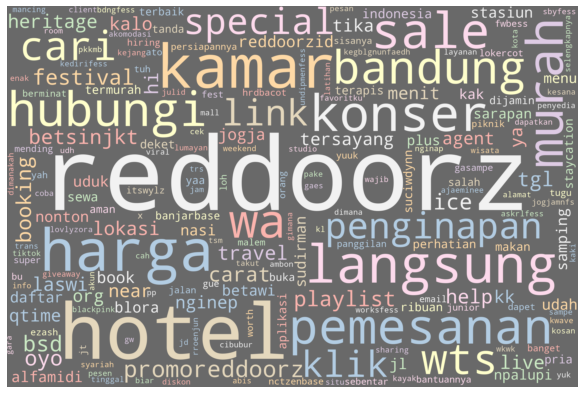

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(
    background_color="dimgrey",
    colormap='Pastel1', 
    width = 3000,
    height = 2000, 
    collocations=False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(20,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Visualization

In [ ]:
import seaborn as sns
import urllib
import re

%matplotlib inline

# Prepare data

In [ ]:
stop_words = set(stopwords.words("english"))

#create function to get a DataFrame
def get_df(input_text):
    list_words = input_text.split(' ')
    set_words_full = list(set(list_words))
    
    #remove stop words
    set_words = [i for i in set_words_full if i not in stop_words]
    
    #count each word
    count_words = [list_words.count(i) for i in set_words]
    
    #create DataFrame
    df = pd.DataFrame(zip(set_words, count_words), columns=['summary','count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

#create function to get a color dictionary
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

## Clean text

In [ ]:
# Clean text
text_c = re.sub('[^A-Za-z0-9°]+', ' ', text)
text_c = text_c.replace('\n', '').lower()
text_c

'kesini mah nginep reddoorz horror kotor yaa gw kl pesen reddoorz gapernah dapet npalupi sarapan nasi uduk betawi jl blora samping alfamidi reddoorz stasiun sudirman harga daftar menu npalupi sarapan nasi uduk betawi jl blora samping alfamidi reddoorz stasiun sudirman harga daftar menu hotel dgn keterangan refundable ya takut takut jd nonton hotel direfund diinget strilanya convomf gw abis makan lgsg pulang singgah reddoorz yuk askrl hi info download reddoorz trs dipake gimana cah gaada booking weekend mumpung akeh sing murah lho reddoorz neng jogja opomaneh reddoorz oyo ya ge reddoorz hiring berminat langsung email yaa bantuannya ezash hrdbacot lokercot reddoorz hiring berminat langsung email yaa bantuannya ezash hrdbacot lokercot hiring berminat langsung email yaa bantuannya ezash hrdbacot lokercot kepinhelmy blkg pondok indah mall reddoorz gk lift npalupi sarapan nasi uduk betawi jl blora samping alfamidi reddoorz stasiun sudirman harga daftar menu gue akun reddoorz diskon reddoorzi

In [ ]:
df_words = get_df(text_c)
df_words.head(10)

,summary,count
0,reddoorz,156
1,hotel,79
2,kamar,45
3,harga,42
4,langsung,34
5,murah,31
6,konser,31
7,sale,30
8,hubungi,29
9,pemesanan,29


## Turning multiple bar charts into a Grid of bar charts.

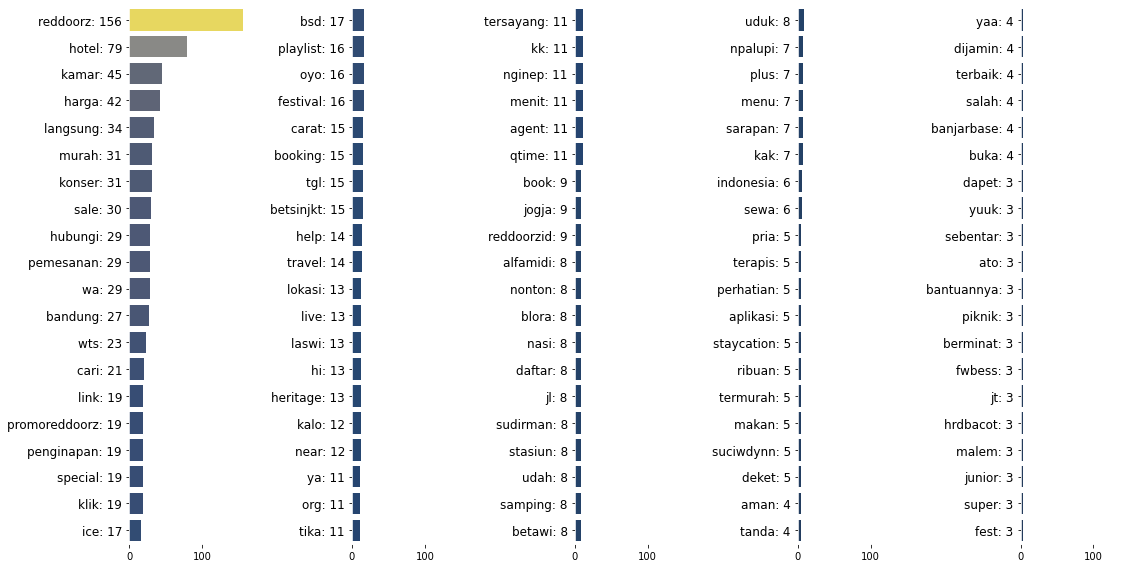

In [ ]:
#create index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

n = df_words['count'].max()
color_dict = get_colordict('cividis', n, 1)

fig, axs = plt.subplots(1, 5, figsize=(16,8), facecolor='white', squeeze=False)
for col, idx in zip(range(0,5), index_list):
    df = df_words[idx[0]:idx[-1]]
    label = [w + ': ' + str(n) for w,n in zip(df['summary'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+1) #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=12)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()
#print(df_words.head(10))
plt.show()

In [ ]:
df2 = pd.DataFrame(df_words.head(10))

In [ ]:
df2

,summary,count
0,reddoorz,156
1,hotel,79
2,kamar,45
3,harga,42
4,langsung,34
5,murah,31
6,konser,31
7,sale,30
8,hubungi,29
9,pemesanan,29


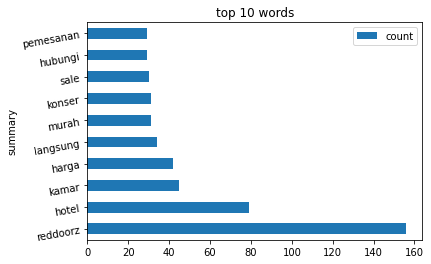

In [ ]:
df2.plot.barh(x="summary", y="count", rot=10, title="top 10 words");

plt.show(block=True);

Refrences:
- https://towardsdatascience.com/beyond-the-cloud-4-visualizations-to-use-instead-of-word-cloud-960dd516f215
- https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d
- https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
- https://www.datacamp.com/tutorial/wordcloud-python